<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture_08_graduate_admission_prediction_using_ann/Lecture_08_graduate_admission_prediction_using_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Import necessary libraries

import numpy as np
import pandas as pd #
import os


In [23]:
# Load the dataset into a pandas DataFrame

df = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [24]:
# Display the first 5 rows of the DataFrame

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [25]:
# Get the dimensions (number of rows and columns) of the DataFrame

df.shape

(500, 9)

In [26]:
# Get information about the DataFrame, including column data types and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [27]:
# Check for duplicate rows in the DataFrame and count them

df.duplicated().sum()

np.int64(0)

In [28]:
# Drop the 'Serial No.' column from the DataFrame in place

df.drop(columns=['Serial No.'],inplace=True)

In [29]:
# Display the first 5 rows of the modified DataFrame

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [30]:
# Separate the features (x) and the target variable (y)

x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [31]:
# Display the target variable (y)

y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [32]:
# Import train_test_split for splitting the data into training and testing sets
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)



In [33]:
# Import MinMaxScaler for feature scaling
# Initialize the MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale the training and testing feature sets

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
# Display the scaled training features

x_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [35]:
# Import tensorflow and keras for building a neural network

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [36]:
# Create a sequential model

model = Sequential()

# Add layers to the model:
# - A dense layer with 7 units, relu activation, and input dimension 7
# - Two more dense layers with 7 units and relu activation
# - A final dense layer with 1 unit and linear activation


model.add(Dense(7, activation='relu',input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# Display a summary of the model architecture

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176 (704.00 B)

 Trainable params: 176 (704.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Compile the model with mean squared error loss and Adam optimizer

model.compile(loss= 'mean_squared_error',optimizer='Adam')


In [39]:
# Train the model on the scaled training data

history = model.fit(x_train_scaled, y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.6426 - val_loss: 0.6413
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.5440 - val_loss: 0.5798
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5244 - val_loss: 0.5277
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4751 - val_loss: 0.4850
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4344 - val_loss: 0.4464
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4002 - val_loss: 0.4029
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3396 - val_loss: 0.3381
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2821 - val_loss: 0.2618
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2123 - val_loss: 0.1831
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1181 - val_loss: 0.0670
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0417 - val_loss: 0.0234
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - lo

In [40]:
# Make predictions on the scaled testing data

y_pred=model.predict(x_test_scaled)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [41]:
# Import r2_score for evaluating the model

from sklearn.metrics import r2_score

# Calculate the R-squared score of the predictions

r2_score(y_test,y_pred)

0.710366671246218

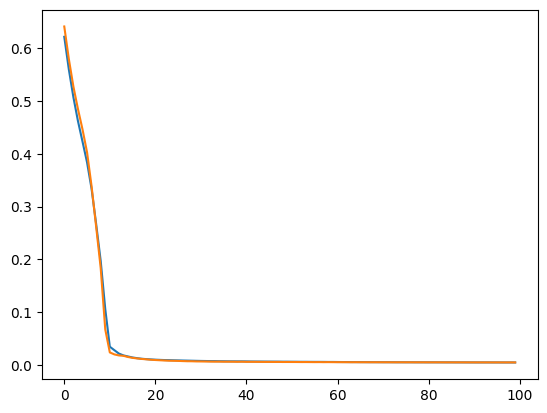

In [42]:
# Import matplotlib for plotting

import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])